## Importing and initializing basic libraries for processing and plotting
## jupyter notebook has lot of inbuilt libraries if any module is missing, we can use 
## 'pip install' to install them

In [1]:
import numpy as np #numpy stands for numerical python. This is fast and provide great tools for mathematical calculation
import pandas as pd # data processing, for csv,text etc files....


import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Text Preprocessing
import nltk
# nltk.download("all")
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize


## Setting the input folder and reading the filenames 
## spam filenames refer to the dataset which is taken as spam mails
## ham filenames refer to the datset which we have to classify 

In [2]:
#folder_s =r'C:\Users\ARUSH\Downloads\hamnspam\mailspam'
#folder_h =r'C:\Users\ARUSH\Downloads\hamnspam\mailham'

#ham_mails_name = [name for name in sorted(os.listdir(folder_h)) if len(name) > 20]
#spam_mails_name = [name for name in sorted(os.listdir(folder_s)) if len(name) > 20]


In [3]:
folder_s =r'C:\Users\ARUSH\Downloads\hamnspam\mailspam'
folder_h =r'C:\Users\ARUSH\Downloads\hamnspam\mailham'

ham_mails_name=[]
for i in sorted(os.listdir(folder_h)):
    if len(i)>10:
        ham_mails_name.append(i)
        
spam_mails_name=[]
for j in sorted(os.listdir(folder_s)):
    if len(j)>10:
        spam_mails_name.append(j)

In [4]:
print(len(ham_mails_name))

2551


In [5]:
print(len(spam_mails_name))

501


## Gaining certain insights from data

In [6]:
print('Mails that are not spam:', len(ham_mails_name))
print('Mails that arespam:', len(spam_mails_name))
print('ham is to spam:', len(ham_mails_name)/len(spam_mails_name))

Mails that are not spam: 2551
Mails that arespam: 501
ham is to spam: 5.091816367265469


## Loading of  data
##  For this we used the email package which is  specially designed in managing email        messages
##  Mainly using its policy components which not only allows email message to be parsed using parser, but to serialize it using standard SMTP settings.

In [7]:
import email
from email import policy

def load_email(is_spam, filename):
    directory = folder_s if is_spam else folder_h
    
    with open(os.path.join(directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)
    
ham_emails = [load_email(is_spam=False, filename=i) for i in ham_mails_name]
spam_emails = [load_email(is_spam=True, filename=j) for j in spam_mails_name]

## Converting different email types to normal text
##  Here we use the inner package counter from collections which counts the data as a hashtable.
## Now we have made two functions -:
## get_email_structure for retrieving the structure of email 
## structure_counter inorder keep count of each type of email.
##  Note-:this procedure is applied for both datasets

In [8]:
from collections import Counter

def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

ham_structure = structures_counter(ham_emails)
spam_structure = structures_counter(spam_emails)


## Beautifulsoup helps us to extract html and xml files. we can provide different parser to it like html,xml etc according to our requirement

In [9]:
def html_to_plain(email):
    try:
        soup = BeautifulSoup(email.get_content(), 'html.parser')
        print('this1')
        return soup.text.replace('\n\n','')
    except:
        print('this')
        return "empty"

## The walk is used as a alternative for "for loop" which each itiration provide us with the next token
## Here we treat every type of email in different manner and convert it into normal text as shown below

In [10]:
def email_to_plain(email):
    struct = get_email_structure(email)
    for part in email.walk():
        partContentType = part.get_content_type()
        if partContentType not in ['text/plain','text/html']:
            continue
        try:
            partContent = part.get_content()
        except:
            partContent = str(part.get_payload())
        if partContentType == 'text/plain':
            return partContent
        else:
            return html_to_plain(part)
        
print(email_to_plain(ham_emails[42]))
print(email_to_plain(spam_emails[45]))


Joseph S. Barrera III wrote:

> Chris Haun wrote:
>
>> A LifeGem is a certified, high quality diamond created from the 
>> carbon of your loved one as a memorial to their unique and wonderful 
>> life.
>
>
> Why wait until you're dead? I'm sure there's enough carbon in
> the fat from your typical liposuction job to make a decent diamond.
>
> - Joe
>
Oh, hell - what about excrement? I'd love to be able to say - No, the 
sun doesn't shine out of my ass, but there's the occasional diamond. ;-).

Owen


http://xent.com/mailman/listinfo/fork


Dear Sir or Madam:

Please reply to 
Receiver: China Enterprise Management Co., Ltd. (CMC)
E-mail: unido@chinatop.net

As one technical organization supported by China Investment and Technical Promotion Office of United Nation Industry Development Organization (UNIDO), we cooperate closely with the relevant Chinese Quality Supervision and Standardization Information Organization. We provide the most valuable consulting services to help you to open Chi

In [11]:
# structure all emails into plain text
ham_emails_plain = [email_to_plain(email) for email in ham_emails if len(ham_emails) > 100]
spam_emails_plain = [email_to_plain(email) for email in spam_emails if len(spam_emails) > 100]

#ham_structure = structures_counter(ham_emails_plain)
#ham_structure.most_common()

this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this
this


## Getting data into Panda dataframe with two columns
## pandas dataframe is a 2-D datastructure with rows and columns

In [12]:
# some data conversion to get it into pandas
ham_dic = {}
spam_dic = {}
ham_dic['text'] = ham_emails_plain
spam_dic['text'] = spam_emails_plain

ham_df = pd.DataFrame(ham_dic, columns = ['text', 'category'])
spam_df = pd.DataFrame(spam_dic, columns = ['text', 'category'])
print(ham_df.head())
print(spam_df.head())


                                                text category
0      Date:        Wed, 21 Aug 2002 10:54:46 -05...      NaN
1  Martin A posted:\nTassos Papadopoulos, the Gre...      NaN
2  Man Threatens Explosion In Moscow \n\nThursday...      NaN
3  Klez: The Virus That Won't Die\n \nAlready the...      NaN
4  On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...      NaN
                                                text category
0  mv 1 00001.bfc8d64d12b325ff385cca8d07b84288\nm...      NaN
1                                              empty      NaN
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      NaN
3  1) Fight The Risk of Cancer!\nhttp://www.adcli...      NaN
4  ##############################################...      NaN


## Now labelling of data in order to differentiate them easily and then comining them into a single data set

In [13]:
# setting labels
ham_df['category'] = 0
spam_df['category'] = 1

frames = [ham_df, spam_df]

# dataframe of messages with proper labels for spam and non-spam
messages = pd.concat(frames).reset_index(drop=True)
messages

,text,category
0,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
1,"Martin A posted:\nTassos Papadopoulos, the Gre...",0
2,Man Threatens Explosion In Moscow \n\nThursday...,0
3,Klez: The Virus That Won't Die\n \nAlready the...,0
4,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...",0
...,...,...
3047,There is NO stumbling on to it! \n\nThe greate...,1
3048,What does it mean to be made in the USA?\n CN...,1
3049,empty,1
3050,empty,1


## Removing the null values as the preprocessing of data
## Showing a pie chart in order to represent the percentage of each type in the dataframe

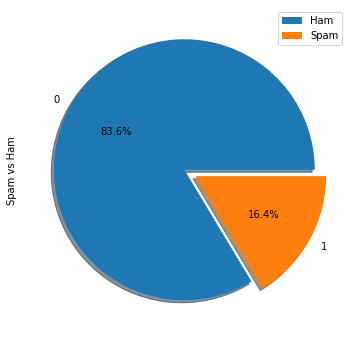

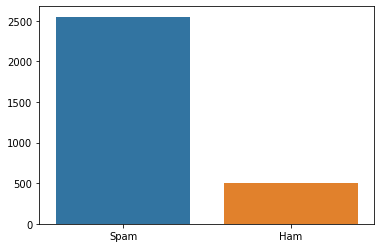

In [14]:
# Dropping rows with NA values
messages.dropna(inplace=True)

messages["category"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()
sns.barplot(x=['Spam','Ham'],y=[messages["category"].value_counts()[0],messages["category"].value_counts()[1]])

plt.show()

## StopWords are bascially the word that contributes nothing to text information. These words not only increase the compution but also can affect the result. Ex a,the,an,of, into etc

In [15]:
import nltk
#nltk.download('stopwords')
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Tokenization of Spam and Ham into words
## Tokenization convers the sentences into individual word (like .split(' ')). Here word_tokenize is used for splitting the words

In [16]:
#import nltk
#nltk.download('punkt')
from nltk import word_tokenize

In [17]:

spam_messages = messages[messages["category"] == 1]["text"]
ham_messages = messages[messages["category"] == 0]["text"]
spam_words = []
ham_words = []

## in natural language processing certain things are needed to be done...
## like tokenizing the words(creating a list of words only) and lowercase the word
## removing the stopwords(words that donot give any info about the subject like the,is,of etc)
## lemitiztion and stemming the word to their root form i.e like working->work etc

In [18]:
 
def extractSpamWords(spamMessages):
    global spam_words, spam_exception_count
    spam_exception_count = 0
    try:
        word_tokenized = word_tokenize(spamMessages)
        words = [word.lower() for word in word_tokenized if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
        spam_words = spam_words + words
    except:
        spam_exception_count += 1
        
def extractHamWords(hamMessages):
    global ham_words, ham_exception_count
    ham_exception_count = 0
    try:
        word_tokenized = word_tokenize(hamMessages)
        words = [word.lower() for word in  word_tokenized if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
        ham_words = ham_words + words
    except:
        ham_exception_count += 1
        
    
# Checking tokenization errors. At some point I had to troubleshoot the code
spam_messages.apply(extractSpamWords)
print('spam exception count: ', spam_exception_count)
ham_messages.apply(extractHamWords)
print('ham exception count: ', ham_exception_count)


spam exception count:  0
ham exception count:  0


## List of words retrieved

In [19]:
#print(spam_words)
#print(ham_words)

## Using wordcloud for pictorial represntation of respective words list

In [20]:
# %pip install wordcloud
from wordcloud import WordCloud

## the ham mail usually conation some casual word lik think ,said ,peopl,mailing,make etc.....
## this observation can be easily made by seeing the wordcloud
## the word cloud shows the word that are most used with a larger font size

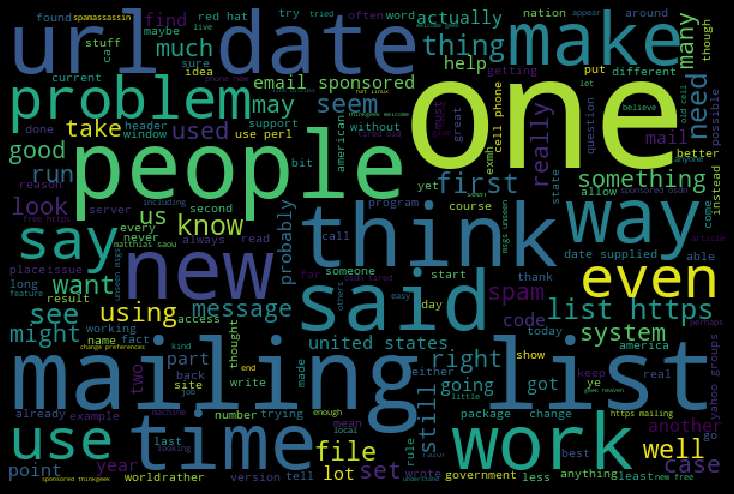

In [21]:
from wordcloud import WordCloud
ham_wordcloud=WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## in spam message their is a trend of using word like business ,mv,money mail etc

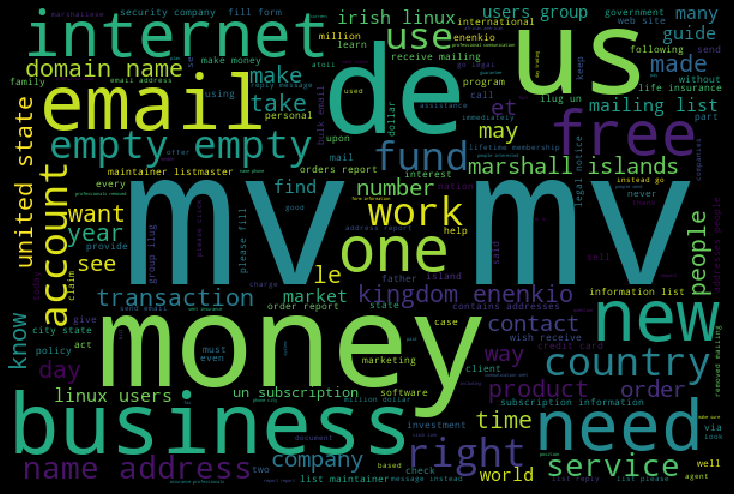

In [22]:
#Spam Word cloud

spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Top 10 most occuring words in each list

## obvisouly their are certian words common to both ham and spam , but some words are only in ham or spam we can find out 
## the top word so that we can rely on those to bulid our ml clasiifcation model
## using all the words as our features will increase the complexity of mode as well as might overfit it casuing a 
## high training efficency but lower testing accuracy

In [23]:
# Top 10 spam words

spam_words = np.array(spam_words)
print("Top 10 Spam words are :\n")
sp_df=pd.Series(spam_words).value_counts().head(n = 10)
print(sp_df)
ham_words = np.array(ham_words)
print("\nTop 10 Ham words are :\n")
ha_df=pd.Series(ham_words).value_counts().head(n = 10)
print(ha_df)


Top 10 Spam words are :

http      641
mv        501
free      325
money     312
email     298
people    294
please    282
one       269
list      265
name      258
dtype: int64

Top 10 Ham words are :

http      3838
one       1262
list      1240
would     1181
get       1088
use       1086
like      1067
people     938
wrote      926
new        911
dtype: int64


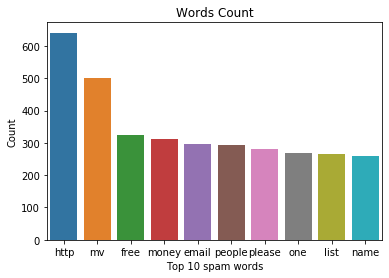

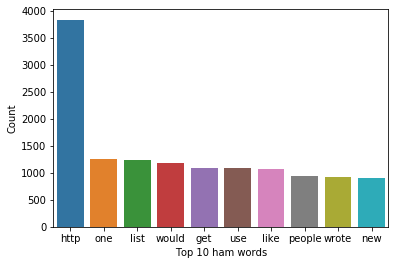

In [24]:
sns.barplot(x=sp_df.index,y=sp_df.values)
plt.xlabel('Top 10 spam words')
plt.ylabel("Count")
plt.title("Words Count")
plt.show()
sns.barplot(x=ha_df.index,y=ha_df.values)
plt.xlabel('Top 10 ham words')
plt.ylabel("Count")
plt.show()

## Describe command give 5 number summary which helps us to analyze our data  

In [25]:
messages["messageLength"] = messages["text"].apply(len)
messages["messageLength"].describe()

count      3051.000000
mean       1462.008194
std        4143.065693
min           5.000000
25%         378.500000
50%         820.000000
75%        1471.500000
max      126335.000000
Name: messageLength, dtype: float64

## Representation of different type of categories in the set with accordance to the number of their occurence in the set according to their category

In [26]:
## The distribution of length of spam male is usually normally distributed while the ham male lengths are quite random .
## this help us to build our classifer model if we can somehow able to find the average length of the spam mails

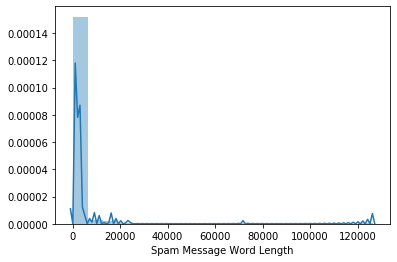

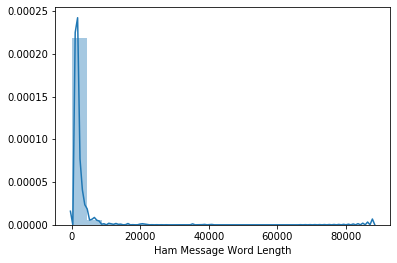

In [27]:
sns.distplot(messages[messages["category"] == 1]["messageLength"], bins = 20)
plt.xlabel("Spam Message Word Length")
plt.show()
sns.distplot(messages[messages["category"] == 0]["messageLength"], bins = 20)
plt.xlabel("Ham Message Word Length")
plt.show()

## stemming helps us to converts the words to their base form which reduces the complexity
## of the codes. stemming works by removing the parts like ed,ing,atives etc and result in 
## words in base form . They stemed word may or may not have meaning in english language

In [28]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def cleanText(message):
    
    try:
        message = message.translate(str.maketrans('', '', string.punctuation))
        words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
        return " ".join(words)
    except:
        print(message)
        
    
messages["text"] = messages["text"].apply(cleanText)
messages.head(n = 10)    


,text,category,messageLength
0,date wed 21 aug 2002 105446 0500 chris garrigu...,0,1604
1,martin post tasso papadopoulo greek sculptor b...,0,899
2,man threaten explos moscow thursday august 22 ...,0,1751
3,klez virus wont die alreadi prolif virus ever ...,0,1127
4,wed aug 21 2002 1546 ulis ponc wrote hi comman...,0,1297
5,ad cream spaghetti carbonara effect pasta make...,0,1052
6,jump carbonara one favourit make ask hell supp...,0,743
7,scotsman 22 august 2002 playboy want go bang a...,0,1326
8,martin adamson wrote isnt basic mixtur beaten ...,0,1221
9,scotsman thu 22 aug 2002 meaning sentenc trace...,0,6115


In [29]:
messages.count()

text             3051
category         3051
messageLength    3051
dtype: int64

In [30]:
##avergaelegth of mails
avg_ham=messages[messages['category']==0]
print('ham length->>',np.mean(avg_ham['messageLength']),"max ->>",np.max(avg_ham['messageLength']),"Min ->>",np.min(avg_ham['messageLength']))
avg_spam=messages[messages['category']==1]
print('spam length->>',np.mean(avg_spam['messageLength']),"max ->>",np.max(avg_spam['messageLength']),"Min ->>",np.min(avg_spam['messageLength']))


ham length->> 1413.033712269698 max ->> 88024 Min ->> 47
spam length->> 1711.876 max ->> 126335 Min ->> 5


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words = "english")
features = vec.fit_transform(messages["text"])
print(features.shape)

(3051, 32132)


## instead of maually spliting the dataset into testing and training we can use sklearn magic
## test train split function allow us to split the dataset into testing and training so that we can make sure that
## our model works well before we demploy them

In [32]:
from sklearn.model_selection import train_test_split
print(features.shape)
print(messages["category"].shape)
X_train, X_test, y_train, y_test = train_test_split(features, messages["category"], stratify = messages["category"], test_size = 0.2)

(3051, 32132)
(3051,)


In [33]:
messages[messages['category']==1].head()   

,text,category,messageLength
2551,mv 1 00001bfc8d64d12b325ff385cca8d07b84288 mv ...,1,22939
2552,empti,1,5
2553,1 fight risk cancer httpwwwadclickwspcfmo315sp...,1,781
2554,1 fight risk cancer httpwwwadclickwspcfmo315sp...,1,625
2555,adult club offer free membership instant acces...,1,2904


## the skleran module has lots of ml algorithms inbuilt only the necessary imports are to be made
## the sklearn module also provides different metrices to test our model for acuuracy

In [34]:
from sklearn.metrics import classification_report

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

names_of_algorithm = ["KNN(K-nearest neighbour)", "Decisiontree", "Randomforest", "Logistic regression", "SGD",
         "naive_bayes", "SVM"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]
pred_label_all=[]
models = zip(names_of_algorithm, classifiers)
train_acc=[]
test_acc=[]
confusion_matt_list=[]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred_label_all.append(y_pred)
    print("\n" + name + ":")
    print("Training accuracy: {:.2f}%".format(100 * model.score(X_train,y_train)))
    test_acc.append(model.score(X_train,y_train))
    print("Testing accuracy: {:.2f}%".format(100 * model.score(X_test,y_test)))
    train_acc.append(model.score(X_test,y_test))
    print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
    print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))
    #print("Confusion Matrix:\n")
    print(classification_report(y_test, y_pred))
    confusion_m = confusion_matrix(y_test, y_pred)
    confusion_matt_list.append(confusion_m)
    #sns.heatmap(confusion_m,annot=True)
    #plt.show()
    #df_cm = pd.DataFrame(confusion_m)
    #print(confusion_m)
    print('----------------------------------------------------------------------------------------------')


KNN(K-nearest neighbour):
Training accuracy: 98.07%
Testing accuracy: 97.22%
Precision: 93.68%
Recall: 89.00%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       511
           1       0.94      0.89      0.91       100

    accuracy                           0.97       611
   macro avg       0.96      0.94      0.95       611
weighted avg       0.97      0.97      0.97       611

----------------------------------------------------------------------------------------------

Decisiontree:
Training accuracy: 100.00%
Testing accuracy: 97.55%
Precision: 92.08%
Recall: 93.00%
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       511
           1       0.92      0.93      0.93       100

    accuracy                           0.98       611
   macro avg       0.95      0.96      0.96       611
weighted avg       0.98      0.98      0.98       611

----------------------------------------

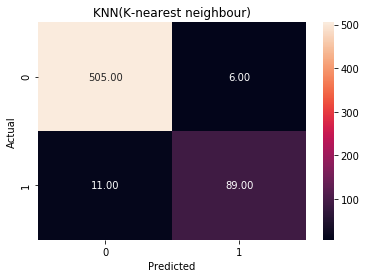

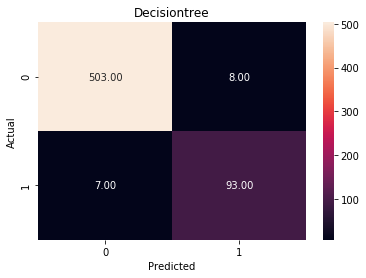

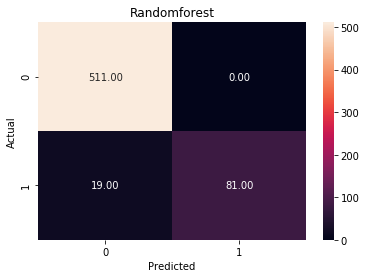

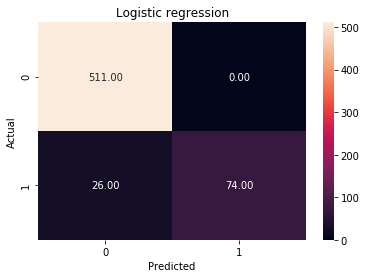

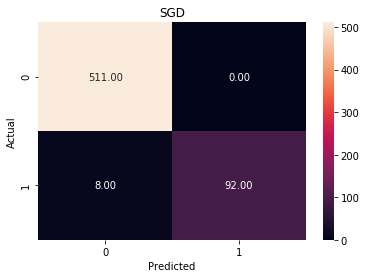

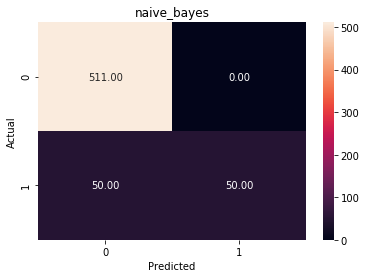

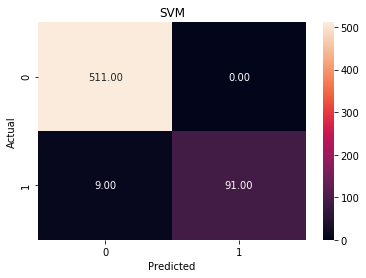

In [36]:
#confusion matrix
j=-1
for i in confusion_matt_list:
    j=j+1
    sns.heatmap(i,annot=True,fmt='.2f',xticklabels=['0','1'],yticklabels=['0','1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(names_of_algorithm[j])
    plt.show()

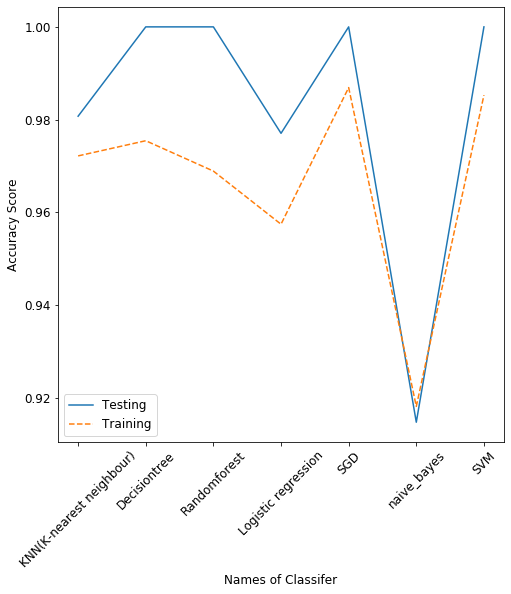

In [37]:
# Test accuracy comparison
matplotlib.rcParams.update({'font.size': 12})
plt.subplots(figsize=(8,8))
plt.plot(names_of_algorithm,test_acc)
plt.plot(names_of_algorithm,train_acc,'--')
plt.legend(['Testing','Training'])
plt.xlabel('Names of Classifer')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.show()


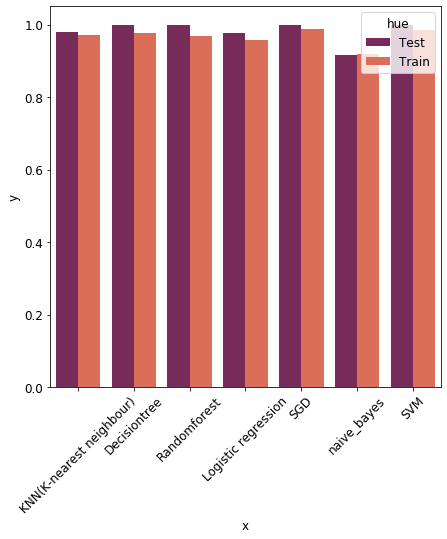

In [38]:
df1=pd.DataFrame({'x': names_of_algorithm,'y': test_acc})
df2=pd.DataFrame({'x': names_of_algorithm,'y': train_acc})
df1['hue']='Test'
df2['hue']='Train'
res=pd.concat([df1,df2])
plt.subplots(figsize=(7,7))
sns.barplot(x='x',y='y',data=res,hue='hue',palette='rocket')
plt.xticks(rotation=45)
plt.show()

In [39]:
!pip install xgboost

In [40]:
from xgboost import XGBClassifier

In [41]:
xgbmodel=XGBClassifier()

xgbmodel.fit(X_train,y_train)
sbgpred=xgbmodel.predict(X_test)

In [42]:
print("Training accuracy: {:.2f}%".format(100 * xgbmodel.score(X_train,y_train)))
print("Testing accuracy: {:.2f}%".format(100 * xgbmodel.score(X_test,y_test)))
print("Precision: {:.2f}%".format(100 * precision_score(y_test, sbgpred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, sbgpred)))
print(classification_report(y_test, sbgpred))
confusion_matrix(y_test, sbgpred)

Training accuracy: 99.88%
Testing accuracy: 98.36%
Precision: 98.91%
Recall: 91.00%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       511
           1       0.99      0.91      0.95       100

    accuracy                           0.98       611
   macro avg       0.99      0.95      0.97       611
weighted avg       0.98      0.98      0.98       611



array([[510,   1],
       [  9,  91]], dtype=int64)

In [43]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
adamodel=AdaBoostClassifier(n_estimators=100)
adamodel.fit(X_train,y_train)
adapred=adamodel.predict(X_test)

In [44]:
print("Training accuracy: {:.2f}%".format(100 * adamodel.score(X_train,y_train)))
print("Testing accuracy: {:.2f}%".format(100 * adamodel.score(X_test,y_test)))
print("Precision: {:.2f}%".format(100 * precision_score(y_test, adapred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, adapred)))
print(classification_report(y_test, adapred))
confusion_matrix(y_test, adapred)

Training accuracy: 100.00%
Testing accuracy: 98.20%
Precision: 98.90%
Recall: 90.00%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       511
           1       0.99      0.90      0.94       100

    accuracy                           0.98       611
   macro avg       0.98      0.95      0.97       611
weighted avg       0.98      0.98      0.98       611



array([[510,   1],
       [ 10,  90]], dtype=int64)

In [45]:
bagmodel=BaggingClassifier()
bagmodel.fit(X_train,y_train)
bagpred=bagmodel.predict(X_test)

In [46]:
print("Training accuracy: {:.2f}%".format(100 * bagmodel.score(X_train,y_train)))
print("Testing accuracy: {:.2f}%".format(100 * bagmodel.score(X_test,y_test)))
print("Precision: {:.2f}%".format(100 * precision_score(y_test, bagpred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, bagpred)))
print(classification_report(y_test, bagpred))
confusion_matrix(y_test, bagpred)

Training accuracy: 99.71%
Testing accuracy: 98.04%
Precision: 97.83%
Recall: 90.00%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       511
           1       0.98      0.90      0.94       100

    accuracy                           0.98       611
   macro avg       0.98      0.95      0.96       611
weighted avg       0.98      0.98      0.98       611



array([[509,   2],
       [ 10,  90]], dtype=int64)

In [47]:
## To overcome the false negatives and false positive we combined the results of predicted value of all the algorithms and 
## took the mode to represent the final classification label.

In [48]:
df_all=pd.DataFrame() ##creating new dataframe to store values

In [49]:
j=0
for i in names_of_algorithm:
    df_all[i]=pred_label_all[j]
    j=j+1

In [50]:
df_all['Final_Labels']=df_all.mode(axis=1) #mode acrosss the columns

In [51]:
df_all.replace(to_replace=[0,1],value=['ham','spam']) #replacing 0 as ham and 1 as spam

,KNN(K-nearest neighbour),Decisiontree,Randomforest,Logistic regression,SGD,naive_bayes,SVM,Final_Labels
0,ham,ham,ham,ham,ham,ham,ham,ham
1,ham,ham,ham,ham,ham,ham,ham,ham
2,ham,ham,ham,ham,ham,ham,ham,ham
3,ham,ham,ham,ham,ham,ham,ham,ham
4,ham,ham,ham,ham,ham,ham,ham,ham
...,...,...,...,...,...,...,...,...
606,ham,ham,ham,ham,ham,ham,ham,ham
607,ham,ham,ham,ham,ham,ham,ham,ham
608,ham,ham,ham,ham,ham,ham,ham,ham
609,ham,ham,ham,ham,ham,ham,ham,ham
